# Задачи классификации и кластеризации



In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
plt.show()

<ipython-input-2-5f7bd2bfae2b>:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [9]:
len(y_test)

45

In [10]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [14]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [15]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [16]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [18]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [19]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

In [20]:
X_train[['ash', 'flavanoids']]

,ash,flavanoids
2,2.67,3.24
100,1.70,2.17
122,2.73,2.13
154,2.10,0.58
51,2.60,2.99
...,...,...
71,2.67,2.86
106,2.12,2.03
14,2.38,3.64
92,2.26,1.46


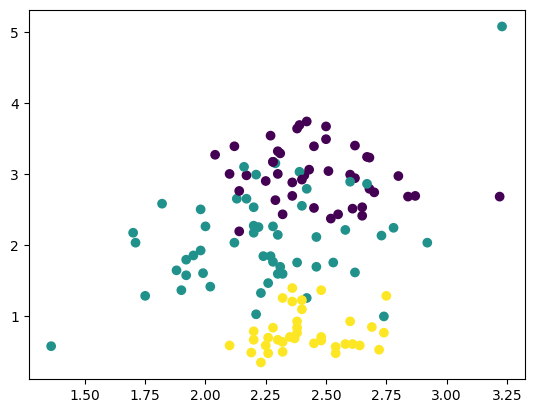

In [21]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)

plt.show()

In [22]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


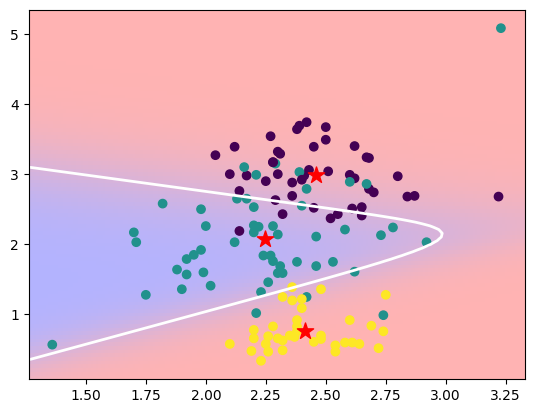

In [24]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


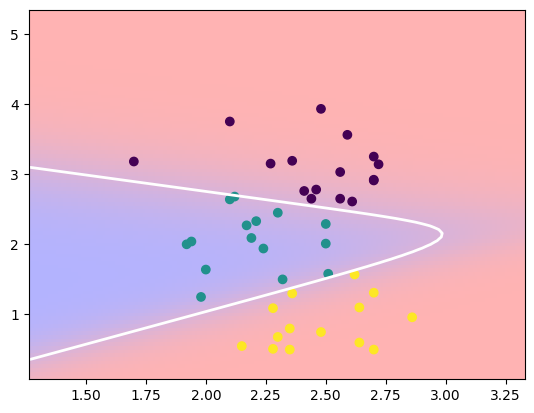

In [25]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [26]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [27]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [28]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [29]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA:
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(small_train, y_train)

LogisticRegression()

In [32]:
lr.predict(small_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2])

In [33]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(small_test)

array([[7.56315717e-01, 2.42697431e-01, 9.86852178e-04],
       [5.42061819e-01, 4.52843490e-01, 5.09469115e-03],
       [8.53373614e-04, 3.62038881e-02, 9.62942738e-01],
       [8.58097850e-01, 1.41530850e-01, 3.71299934e-04],
       [1.20564684e-01, 8.51587157e-01, 2.78481588e-02],
       [8.33120043e-01, 1.66221700e-01, 6.58256678e-04],
       [6.43497819e-02, 8.28135786e-01, 1.07514432e-01],
       [3.35801055e-03, 1.21839544e-01, 8.74802446e-01],
       [7.55525954e-01, 2.42549226e-01, 1.92482047e-03],
       [9.97058289e-04, 7.36030133e-02, 9.25399928e-01],
       [5.86569969e-01, 4.05915005e-01, 7.51502572e-03],
       [1.00038895e-01, 5.55831728e-01, 3.44129377e-01],
       [4.32620704e-01, 5.64484610e-01, 2.89468530e-03],
       [2.29300956e-02, 6.69161853e-01, 3.07908052e-01],
       [7.51728984e-01, 2.46250167e-01, 2.02084982e-03],
       [2.61788671e-01, 7.21911814e-01, 1.62995145e-02],
       [2.45880961e-01, 6.79717516e-01, 7.44015224e-02],
       [9.48186628e-02, 6.14480

In [34]:
accuracy_score(y_test, lr.predict(small_test))

0.8

In [35]:
lr.coef_

array([[ 0.34145518,  2.46350785],
       [-1.24113815,  0.44535339],
       [ 0.89968298, -2.90886124]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


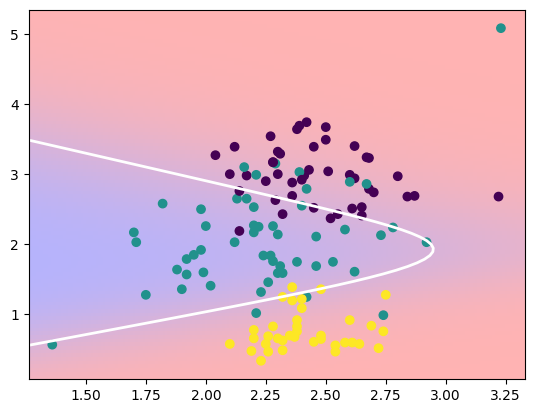

In [36]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


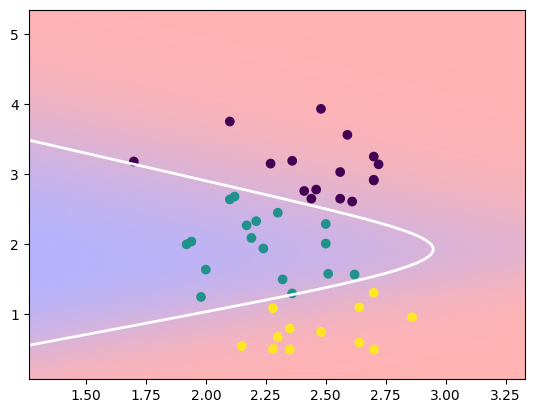

In [37]:
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lr.predict(small_test))

nx, ny = 200, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

## Кластеризация

In [38]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [39]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [40]:
X

array([[  6.84576547,  -6.86371286],
       [ -3.94800553,  11.53033277],
       [  4.27601912,  -9.70497394],
       [  3.05025054,  -8.46130587],
       [ -4.62689892,  10.50530536],
       [ -6.68487988,  11.36319871],
       [  1.68695852,  -7.79549437],
       [ -6.45906858,   6.98591536],
       [  1.17975878, -11.52662292],
       [ -0.85213012,  11.50663304],
       [  4.14780103,  -8.44921057],
       [ -9.18047653,   5.40710472],
       [ -6.16314563,  11.85647669],
       [ -1.6946228 ,  14.4714169 ],
       [ -8.15475422,   8.38721929],
       [ -3.7184286 ,  11.32074702],
       [ -6.89883504,  11.6122936 ],
       [  3.30699055,  -9.30730867],
       [ -3.06755505,   6.29502479],
       [-10.31960834,   9.71207114],
       [  3.0036925 ,  -8.00565307],
       [ -5.45912207,  11.27271857],
       [ -4.82405981,   9.9861817 ],
       [  3.61274282, -11.84650836],
       [ -3.4365099 ,  14.83374037],
       [  0.94893957,  -4.40854909],
       [ -0.58278788,  -7.26641647],
 

<ipython-input-41-a3a6361253ac>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)


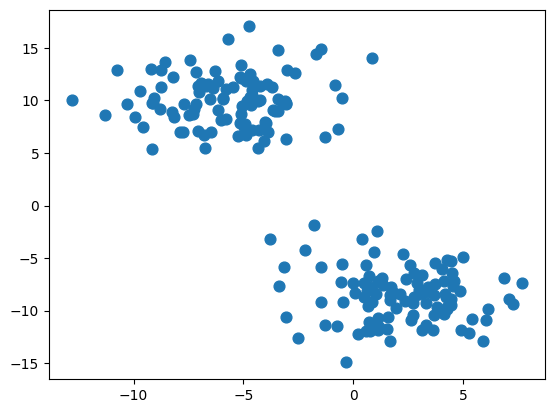

In [41]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [42]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [44]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [45]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
0
9
0


In [46]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[-0.16478724],
       [ 1.52360665],
       [ 0.17289153],
       [-0.50246602],
       [ 0.84824909],
       [ 0.84824909],
       [ 1.18592787],
       [ 1.52360665],
       [-0.16478724],
       [-0.16478724],
       [-1.51550236],
       [ 0.84824909],
       [ 1.18592787],
       [ 0.17289153],
       [ 0.17289153],
       [ 0.51057031],
       [-0.8401448 ],
       [ 0.17289153],
       [ 0.51057031],
       [ 0.17289153],
       [-0.16478724],
       [ 1.18592787],
       [ 1.52360665],
       [ 0.17289153],
       [ 1.18592787],
       [-1.17782358],
       [-1.17782358],
       [ 1.18592787],
       [ 0.17289153],
       [-0.8401448 ],
       [ 0.84824909],
       [ 0.84824909],
       [ 0.51057031],
       [-0.16478724],
       [-1.51550236],
       [ 1.52360665],
       [ 0.84824909],
       [-0.50246602],
       [ 0.84824909],
       [ 0.51057031],
       [ 0.84824909],
       [-0.50246602],
       [ 1.18592787],
       [-0.16478724],
       [ 1.52360665],
       [-1

In [47]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.6341183849031233
-1.7897447903714596
1.523606650916972
-1.5155023602206055


In [48]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.85463652, -0.78967872],
       [-0.46313325,  1.11885303],
       [ 1.30282934, -1.08448265],
       [ 1.0396174 , -0.95544198],
       [-0.6089135 ,  1.0124981 ],
       [-1.05082819,  1.10151151],
       [ 0.74687476, -0.88635863],
       [-1.00233925,  0.64733278],
       [ 0.63796266, -1.27349354],
       [ 0.20165077,  1.11639399],
       [ 1.27529679, -0.954187  ],
       [-1.58671306,  0.48351834],
       [-0.93879507,  1.15269311],
       [ 0.02074049,  1.42401441],
       [-1.36645749,  0.79272945],
       [-0.4138357 ,  1.0971068 ],
       [-1.09677125,  1.12735713],
       [ 1.09474774, -1.04322165],
       [-0.27407221,  0.57564727],
       [-1.83132129,  0.9301936 ],
       [ 1.02961989, -0.9081643 ],
       [-0.78761857,  1.09212346],
       [-0.65125028,  0.9586348 ],
       [ 1.16040258, -1.30668426],
       [-0.35329869,  1.46160842],
       [ 0.58839835, -0.53493552],
       [ 0.25948721, -0.83146249],
       [-1.22343948,  0.82142585],
       [ 0.42862892,

<ipython-input-49-2db0c5f3ae5e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


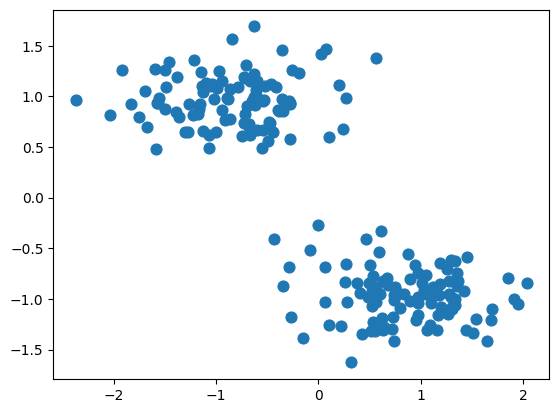

In [49]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [50]:
from sklearn.cluster import KMeans

In [51]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       1, 0], dtype=int32)

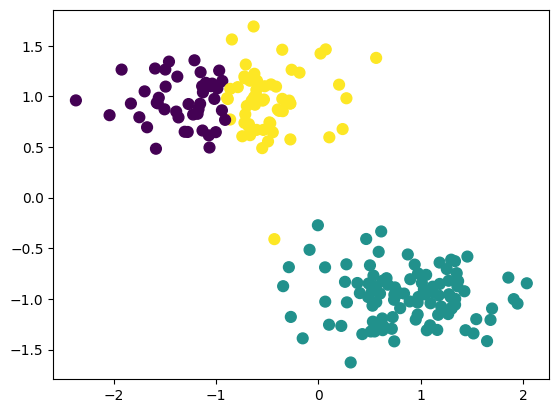

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='viridis', c=clusters, s=60)

In [53]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

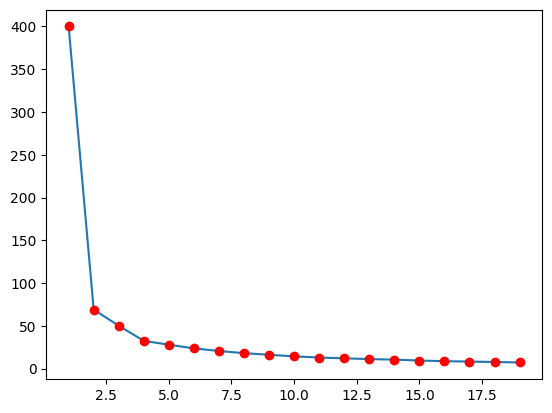

In [54]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [55]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

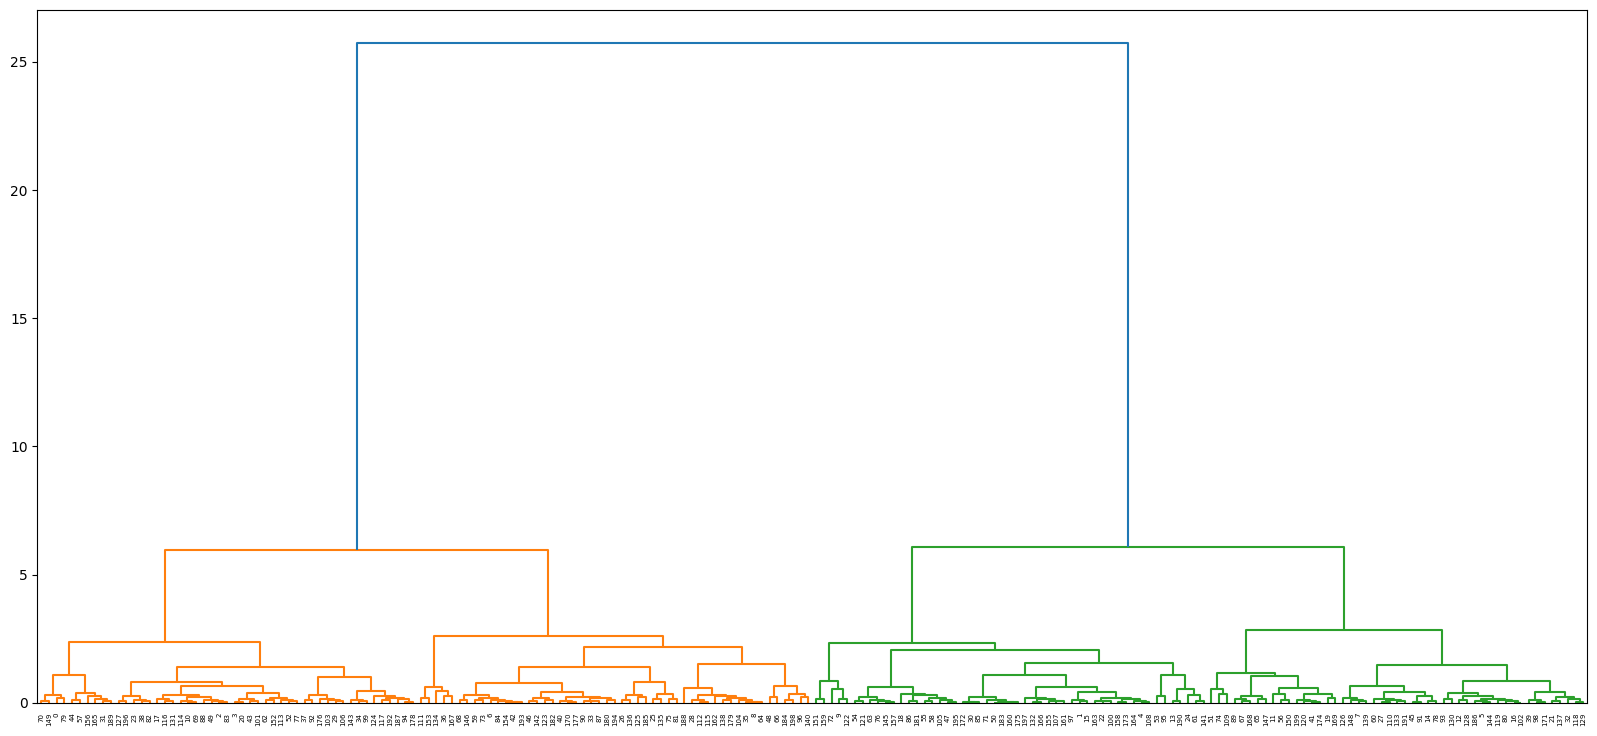

In [56]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [57]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [58]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2,
       0, 1])

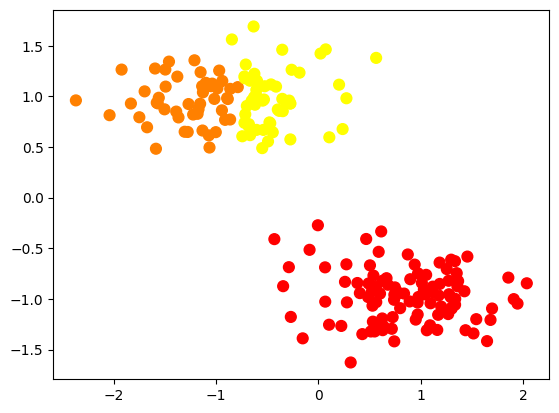

In [59]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [60]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,6.845765,-6.863713,0
1,-3.948006,11.530333,2
2,4.276019,-9.704974,0
3,3.050251,-8.461306,0
4,-4.626899,10.505305,2
...,...,...,...
195,-3.981276,7.832813,2
196,2.721839,-10.380138,0
197,-5.095494,13.423742,2
198,-0.751169,-11.464906,0
